In [4]:
#print(os.getcwd())

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

In [2]:
# # Analyzing the dataset
# advert_report = sv.analyze(df_0)
# advert_report.show_html('EDA_BD_inicial_churn.html')

In [6]:
import os
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_0 = pd.read_csv('/workspaces/Template-Bootcamp/data/telco_churn_data.csv')
df_0.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,9,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,41.236,39.65,0.00,0.0,0.00,Male,78,No,Yes,No,No,0,Los Angeles,90022,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,19,No,Yes,No,No,No,No,No,No,Month-to-Month,Yes,Credit Card,83.876,633.30,0.00,120.0,390.80,Female,74,No,Yes,Yes,Yes,1,Los Angeles,90063,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,57,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,99.268,1752.55,45.61,0.0,203.94,Male,71,No,Yes,No,Yes,3,Los Angeles,90065,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,13,No,Yes,Yes,No,Yes,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,102.440,2514.50,13.43,327.0,494.00,Female,78,No,Yes,Yes,Yes,1,Inglewood,90303,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,15,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,79.560,2868.15,0.00,430.0,234.21,Female,80,No,Yes,Yes,Yes,1,Whittier,90602,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


Presentamos las dimensiones del Dataframe para darnos una idea de la cantidad de datos con los que vamos a trabajar:

In [21]:
# Dimensiones del Dataframe
df_0.shape

(7043, 46)

Identificamos que tenemos 7043 observaciones con 46 variables.

Vamos a validar la cantidad de nulos por variable:

In [23]:
np.sum(df_0.isnull(), axis = 0)

Customer ID                          0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Regular Charges                0
Total Refunds                        0
Total Extra Data Charges 

In [7]:
# Cantidad de valores únicos por variable
df_0.nunique()

Customer ID                          7043
Referred a Friend                       2
Number of Referrals                    12
Tenure in Months                       72
Offer                                   5
Phone Service                           2
Avg Monthly Long Distance Charges    3584
Multiple Lines                          2
Internet Service                        2
Internet Type                           3
Avg Monthly GB Download                63
Online Security                         2
Online Backup                           2
Device Protection Plan                  2
Premium Tech Support                    2
Streaming TV                            2
Streaming Movies                        2
Streaming Music                         2
Unlimited Data                          2
Contract                                3
Paperless Billing                       2
Payment Method                          3
Monthly Charge                       2298
Total Regular Charges             

In [ ]:
# Tipos de variables
df_0.dtypes

Customer ID                           object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless Billing                     object
Payment Method                        object
Monthly Ch

In [9]:
df_0.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,9,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,41.236,39.65,0.00,0.0,0.00,Male,78,No,Yes,No,No,0,Los Angeles,90022,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,19,No,Yes,No,No,No,No,No,No,Month-to-Month,Yes,Credit Card,83.876,633.30,0.00,120.0,390.80,Female,74,No,Yes,Yes,Yes,1,Los Angeles,90063,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,57,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,99.268,1752.55,45.61,0.0,203.94,Male,71,No,Yes,No,Yes,3,Los Angeles,90065,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,13,No,Yes,Yes,No,Yes,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,102.440,2514.50,13.43,327.0,494.00,Female,78,No,Yes,Yes,Yes,1,Inglewood,90303,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,15,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,79.560,2868.15,0.00,430.0,234.21,Female,80,No,Yes,Yes,Yes,1,Whittier,90602,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


In [8]:
# Conteo de la variable 'Churn Value'
print(df_0["Churn Value"].value_counts())
print(df_0["Churn Value"].value_counts(10))

Churn Value
0    5174
1    1869
Name: count, dtype: int64
Churn Value
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [10]:
df_0['Customer Satisfaction'].value_counts().sort_index()

Customer Satisfaction
1.0    332
2.0    200
3.0    675
4.0    380
5.0    247
Name: count, dtype: int64

In [11]:
# Reemplazar valores nulos en columnas de tipo objeto con una cadena vacía
columns_to_fill_with_empty_string = ['Offer', 'Internet Type', 'Churn Category', 'Churn Reason']
df_0[columns_to_fill_with_empty_string] = df_0[columns_to_fill_with_empty_string].fillna('')

# Reemplazar valores nulos en 'Customer Satisfaction' con -1
df_0['Customer Satisfaction'] = df_0['Customer Satisfaction'].fillna(-1)

# Verificar que ya no hay valores nulos
print(df_0.isnull().sum())

Customer ID                          0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Regular Charges                0
Total Refunds                        0
Total Extra Data Charges 

In [12]:
df_0.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,,No,0.00,No,Yes,Fiber Optic,9,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,41.236,39.65,0.00,0.0,0.00,Male,78,No,Yes,No,No,0,Los Angeles,90022,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,-1.0
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,19,No,Yes,No,No,No,No,No,No,Month-to-Month,Yes,Credit Card,83.876,633.30,0.00,120.0,390.80,Female,74,No,Yes,Yes,Yes,1,Los Angeles,90063,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,-1.0
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,57,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,99.268,1752.55,45.61,0.0,203.94,Male,71,No,Yes,No,Yes,3,Los Angeles,90065,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,-1.0
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,13,No,Yes,Yes,No,Yes,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,102.440,2514.50,13.43,327.0,494.00,Female,78,No,Yes,Yes,Yes,1,Inglewood,90303,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,15,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,79.560,2868.15,0.00,430.0,234.21,Female,80,No,Yes,Yes,Yes,1,Whittier,90602,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


#### **Recall, Precision y F1-Score**

Con nuestro modelo construido podemos empezar a tener algunas conclusiones. Por ejemplo, a partir de la  matriz de confusión podemos ver que, de los 209 positivos reales sólo ha acertado en 2 casos: un 0.96% de acierto.

* **Recall:**

$$ Recall =  \frac{TP}{TP+FN}$$

$$ Recall =  \frac{2}{2+207}$$

$$ Recall =  0.0096$$

También podemos ver que, de todas las ocasiones en las que KNN nos dice que el paciente tuvo un accidente cerebrovascular (17), hay 2 en las que ha acertado: un 11.76%

* **Precision:**

$$ Precision =  \frac{TP}{TP+FP}$$

$$ Precision =  \frac{2}{2+15}$$

$$ Precision =  0.1176$$

## **Regresión logística**

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Identificar características numéricas y categóricas
num_features = df_0.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = df_0.select_dtypes(include=['object']).columns.tolist()

In [15]:
# Codificar variables categóricas
label_encoders = {}
for col in cat_features:
    le = LabelEncoder()
    df_0[col] = le.fit_transform(df_0[col].astype(str))
    label_encoders[col] = le

In [16]:
df_0.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,6207,0,0,1,0,0,0.00,0,1,3,9,0,0,1,0,0,1,0,0,0,1,0,41.236,39.65,0.00,0.0,0.00,1,78,0,1,0,0,0,554,90022,34.023810,-118.156582,68701,1,5433,2,6,5,0,-1.0
1,5305,1,1,8,5,1,48.85,1,1,1,19,0,1,0,0,0,0,0,0,0,1,1,83.876,633.30,0.00,120.0,390.80,0,74,0,1,1,1,1,554,90063,34.044271,-118.185237,55668,1,5302,2,4,5,0,-1.0
2,1129,0,0,18,4,1,11.33,1,1,3,57,0,0,0,0,1,1,1,1,0,1,0,99.268,1752.55,45.61,0.0,203.94,1,71,0,1,0,1,3,554,90065,34.108833,-118.229715,47534,1,3179,2,4,1,0,-1.0
3,3208,1,1,25,3,1,19.76,0,1,3,13,0,1,1,0,1,1,0,0,0,1,0,102.440,2514.50,13.43,327.0,494.00,0,78,0,1,1,1,1,448,90303,33.936291,-118.332639,27778,1,5337,3,12,1,1,2.0
4,3419,1,1,37,3,1,6.33,1,1,1,15,0,0,0,0,0,0,0,0,0,1,0,79.560,2868.15,0.00,430.0,234.21,0,80,0,1,1,1,1,1072,90602,33.972119,-118.020188,26265,1,2793,5,9,1,0,2.0


In [17]:
# Separar características y variable objetivo
X = df_0.drop(columns=['Churn Value', 'Churn Category', 'Churn Reason', 'Customer ID',
                       'Avg Monthly Long Distance Charges','CLTV','Number of Dependents','Under 30',
                       'Total Regular Charges','Total Extra Data Charges','Total Long Distance Charges','Gender',
                       'Payment Method','Device Protection Plan','Streaming Music','Total Refunds'])  # Eliminamos 'Customer ID' y 'Churn Value' ya que no son características
y = df_0['Churn Value']

In [18]:
# print(result.summary())

In [19]:
# Actualizar num_features y cat_features después de eliminar 'Churn Value'
num_features = [col for col in num_features if col in X.columns]
cat_features = [col for col in cat_features if col in X.columns]

In [20]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [22]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Normalizar características numéricas
scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [24]:
X_train.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Premium Tech Support,Streaming TV,Streaming Movies,Unlimited Data,Contract,Paperless Billing,Monthly Charge,Age,Senior Citizen,Married,Dependents,City,Zip Code,Latitude,Longitude,Population,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
6924,1,-0.311605,0.471554,0,1,0,1,1,0.125696,0,1,1,0,0,1,0,1,-0.120627,-0.321828,0,1,1,187,-0.958130,-0.915530,0.944866,2.136289,-0.243715,-0.426397,2.124068
5249,1,0.688157,0.471554,0,1,0,1,1,1.450004,0,1,1,0,0,1,0,1,-0.349897,0.694461,0,1,1,857,0.335392,0.646783,-1.237497,0.340416,0.450466,-0.426397,-0.556591
5852,1,2.687679,-0.667978,0,1,0,1,2,0.409477,1,1,1,0,1,1,2,0,0.087354,-0.859864,0,1,1,718,-1.162456,-0.788257,0.621403,3.590073,-0.937895,-0.426397,-0.556591
3597,0,-0.644858,-0.952861,5,1,1,1,3,-0.631051,0,0,0,0,0,1,0,1,0.369028,0.275989,0,0,0,554,-1.873812,-0.876304,0.693482,-0.318743,1.144646,-0.426397,-0.556591
4147,1,2.687679,0.797135,0,1,0,0,0,-1.009424,0,0,0,0,0,0,2,0,-1.519172,-1.637027,0,1,1,384,0.240797,0.023425,-0.757365,-0.363264,-0.937895,-0.426397,-0.556591


In [25]:
# Media y Desviación Estandar
print (round(X_train["Monthly Charge"].mean(),2))
print (round(X_train["Monthly Charge"].std(),2))

-0.0
1.0


In [26]:
# Entrenar modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [28]:
# Predicciones
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [27]:
# Métricas en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

In [30]:
import statsmodels.api as sm
# Add a constant to the model (intercept)
X = sm.add_constant(X)

In [31]:
model = sm.Logit(y, X)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.209081
         Iterations 9


In [32]:
# Print the summary
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:            Churn Value   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7012
Method:                           MLE   Df Model:                           30
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                  0.6386
Time:                        15:41:45   Log-Likelihood:                -1472.6
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -15.4975      6.219     -2.492      0.013     -27.686      -3.309
Referred a Friend                   1.4706      0.326      4.517    

In [33]:
# # Importancia de características
# importance = model.coef_[0]
# features = X.columns
# feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance}).sort_values(by='Importance', ascending=False)

# plt.figure(figsize=(12, 8))
# sns.barplot(x='Importance', y='Feature', data=feature_importance)
# plt.title('Feature Importance')
# plt.show()

Train Accuracy: 0.9140930067447639
Train AUC: 0.9631697631123617
Train Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      4131
           1       0.87      0.80      0.83      1503

    accuracy                           0.91      5634
   macro avg       0.90      0.88      0.89      5634
weighted avg       0.91      0.91      0.91      5634



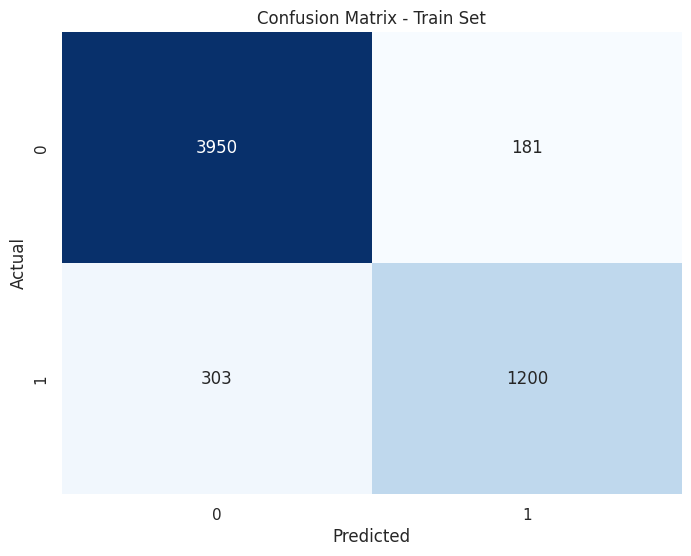

In [34]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_pred_proba)
train_report = classification_report(y_train, y_train_pred)

print('Train Accuracy:', train_accuracy)
print('Train AUC:', train_auc)
print('Train Classification Report:\n', train_report)

# Matriz de confusión en el conjunto de entrenamiento
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Train Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Test Accuracy: 0.9070262597586941
Test AUC: 0.9589325663151166
Test Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      1043
           1       0.84      0.79      0.82       366

    accuracy                           0.91      1409
   macro avg       0.89      0.87      0.88      1409
weighted avg       0.91      0.91      0.91      1409



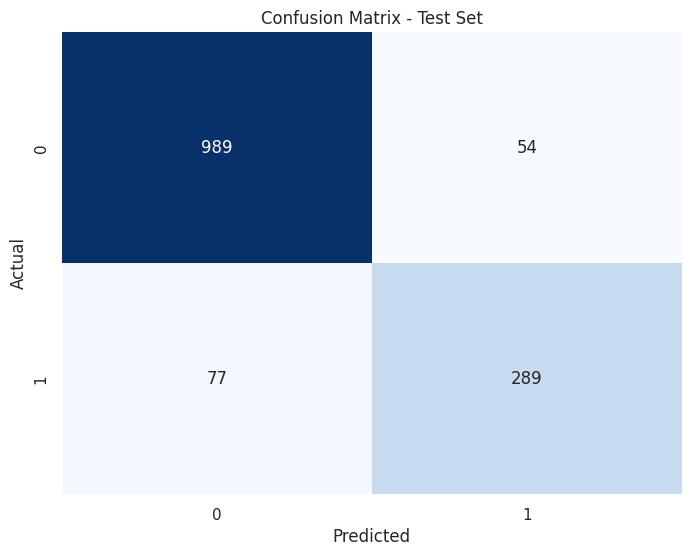

In [37]:
# Métricas en el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_pred)
test_auc = roc_auc_score(y_test, y_pred_proba)
test_report = classification_report(y_test, y_pred)

print('Test Accuracy:', test_accuracy)
print('Test AUC:', test_auc)
print('Test Classification Report:\n', test_report)

# Matriz de confusión en el conjunto de prueba
test_conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [35]:
X_train.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Premium Tech Support,Streaming TV,Streaming Movies,Unlimited Data,Contract,Paperless Billing,Monthly Charge,Age,Senior Citizen,Married,Dependents,City,Zip Code,Latitude,Longitude,Population,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
6924,1,-0.311605,0.471554,0,1,0,1,1,0.125696,0,1,1,0,0,1,0,1,-0.120627,-0.321828,0,1,1,187,-0.958130,-0.915530,0.944866,2.136289,-0.243715,-0.426397,2.124068
5249,1,0.688157,0.471554,0,1,0,1,1,1.450004,0,1,1,0,0,1,0,1,-0.349897,0.694461,0,1,1,857,0.335392,0.646783,-1.237497,0.340416,0.450466,-0.426397,-0.556591
5852,1,2.687679,-0.667978,0,1,0,1,2,0.409477,1,1,1,0,1,1,2,0,0.087354,-0.859864,0,1,1,718,-1.162456,-0.788257,0.621403,3.590073,-0.937895,-0.426397,-0.556591
3597,0,-0.644858,-0.952861,5,1,1,1,3,-0.631051,0,0,0,0,0,1,0,1,0.369028,0.275989,0,0,0,554,-1.873812,-0.876304,0.693482,-0.318743,1.144646,-0.426397,-0.556591
4147,1,2.687679,0.797135,0,1,0,0,0,-1.009424,0,0,0,0,0,0,2,0,-1.519172,-1.637027,0,1,1,384,0.240797,0.023425,-0.757365,-0.363264,-0.937895,-0.426397,-0.556591


In [97]:
accuracy_train_lr = round(100.0*accuracy_score(y_train, y_train_pred),2)
accuracy_test_lr = round(100.0*accuracy_score(y_test, y_pred),2)
auc_lr = roc_auc_score(y_train, y_train_pred_proba)

# Compute the classification report
report_lr = classification_report(y_test, y_pred, output_dict=True)
# Extract precision, recall, F-1 score for class 1
precision_class_1_lr = report_lr['1']['precision']
recall_class_1_lr = report_lr['1']['recall']
f1_class_1_lr = report_lr['1']['f1-score']

* **Recall Train:**

$$ Recall =  \frac{TP}{TP+FN}$$

$$ Recall =  \frac{6}{6+151}$$

$$ Recall =  0.0382$$

* **Precision Train:**

$$ Precision =  \frac{TP}{TP+FP}$$

$$ Precision =  \frac{6}{6+4}$$

$$ Precision =  0.6$$

In [53]:
X_train.shape

(5634, 30)

### **Modelo 1 Random Forest**

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

## Generación del modelo
rf_model = RandomForestClassifier(random_state = 120, n_estimators=20, max_samples=0.5, max_depth=7)
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=7, max_samples=0.5, n_estimators=20,
                       random_state=120)

In [50]:
pred_train = rf_model.predict(X_train)
pred_test = rf_model.predict(X_test)

print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*rf_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*rf_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 92.53
Precisión sobre los datos de test: 91.20


Classification report for classifier RandomForestClassifier(max_depth=7, max_samples=0.5, n_estimators=20,
                       random_state=120):
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4131
           1       0.94      0.77      0.85      1503

    accuracy                           0.93      5634
   macro avg       0.93      0.88      0.90      5634
weighted avg       0.93      0.93      0.92      5634




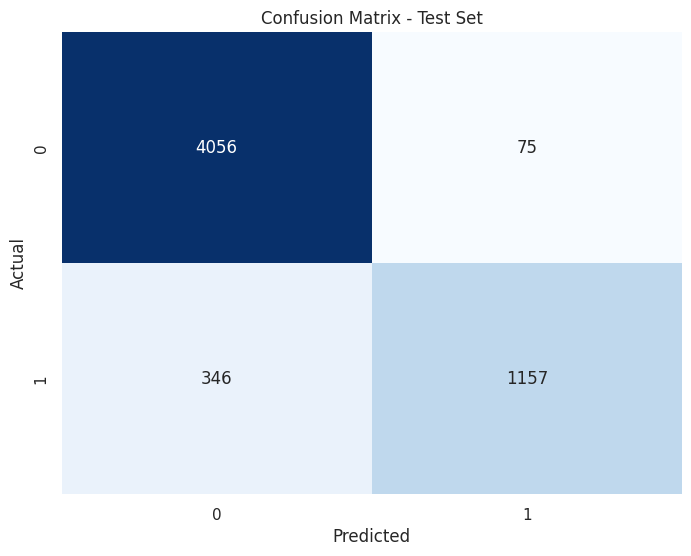

In [51]:
print(f"Classification report for classifier {rf_model}:\n"
      f"{metrics.classification_report(y_train, pred_train)}\n")

# Matriz de confusión en el conjunto de prueba
test_conf_matrix = confusion_matrix(y_train, pred_train)
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Classification report for classifier RandomForestClassifier(max_depth=7, max_samples=0.5, n_estimators=20,
                       random_state=120):
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1043
           1       0.92      0.72      0.81       366

    accuracy                           0.91      1409
   macro avg       0.92      0.85      0.88      1409
weighted avg       0.91      0.91      0.91      1409




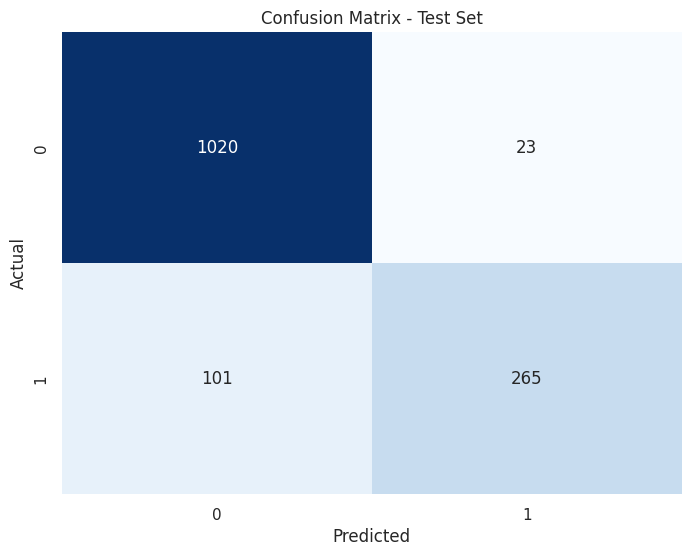

In [52]:
print(f"Classification report for classifier {rf_model}:\n"
      f"{metrics.classification_report(y_test, pred_test)}\n")

# Matriz de confusión en el conjunto de prueba
test_conf_matrix = confusion_matrix(y_test, pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### **Optimización n_estimators**

El siguiente paso seria optimizar el n_estimators. Para ello partiremos del max_depth=9 calculado en el apartado anterior y haremos el recorrido entre 1 y 100 para encontrar el mejor valor:

In [56]:
md_list = []
score_train_list = []
score_test_list = []

for n_estimators in list(range(1,30,1)):
  rf_model = RandomForestClassifier(random_state=0, max_depth=9, n_estimators=n_estimators, n_jobs=5)
  rf_model.fit(X_train, y_train)

  ## Generación de listas
  md_list.append(n_estimators)
  score_train_list.append(100.0*rf_model.score(X_train, y_train))
  score_test_list.append(100.0*rf_model.score(X_test, y_test))

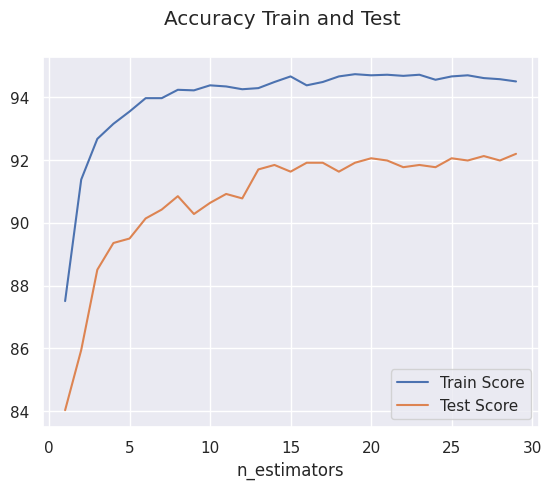

In [57]:
df_graph = pd.DataFrame({"n_estimators":md_list,
                   "score_train":score_train_list,
                   "score_test":score_test_list})

df_graph.set_index("n_estimators", inplace=True)
df_graph["score_train"].plot(label="Train Score")
df_graph["score_test"].plot(label="Test Score")
plt.suptitle("Accuracy Train and Test")
plt.legend()
plt.show();

#### **Optimización max_depth**

Empezaremos por optimizar el valor de max_depth:

In [58]:
md_list = []
score_train_list = []
score_test_list = []

for maxdepth in list(range(1,15,1)):
  rf_model = RandomForestClassifier(random_state=0, n_estimators=20, max_depth=maxdepth, n_jobs=5)
  rf_model.fit(X_train, y_train)

  ## Generación de listas
  md_list.append(maxdepth)
  score_train_list.append(100.0*rf_model.score(X_train, y_train))
  score_test_list.append(100.0*rf_model.score(X_test, y_test))

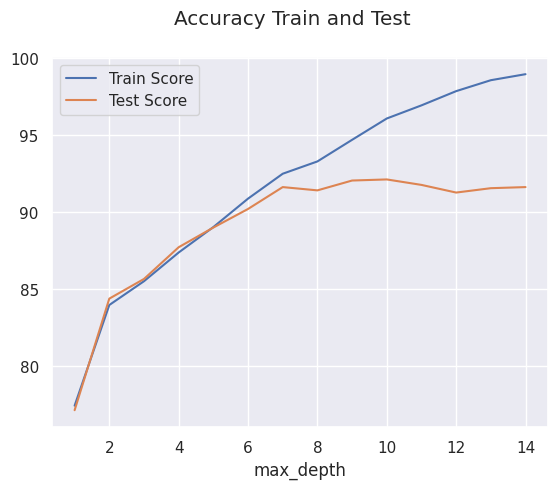

In [59]:
df_graph = pd.DataFrame({"max_depth":md_list,
                   "score_train":score_train_list,
                   "score_test":score_test_list})

df_graph.set_index("max_depth", inplace=True)
df_graph["score_train"].plot(label="Train Score")
df_graph["score_test"].plot(label="Test Score")
plt.suptitle("Accuracy Train and Test")
plt.legend()
plt.show();

In [61]:
## Generación del modelo
rf_model_tunned = RandomForestClassifier(random_state = 120, n_estimators=20, max_samples=0.5, max_depth=7)
rf_model_tunned.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_samples=0.5, n_estimators=20,
                       random_state=120)

In [72]:
pred_train_tunned = rf_model_tunned.predict(X_train)
pred_test_tunned = rf_model_tunned.predict(X_test)

print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*rf_model_tunned.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*rf_model_tunned.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 92.53
Precisión sobre los datos de test: 91.20


In [73]:
rf_model_tunned.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_samples=0.5, n_estimators=20,
                       random_state=120)

Classification report for classifier RandomForestClassifier(max_depth=7, max_samples=0.5, n_estimators=20,
                       random_state=120):
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4131
           1       0.94      0.77      0.85      1503

    accuracy                           0.93      5634
   macro avg       0.93      0.88      0.90      5634
weighted avg       0.93      0.93      0.92      5634




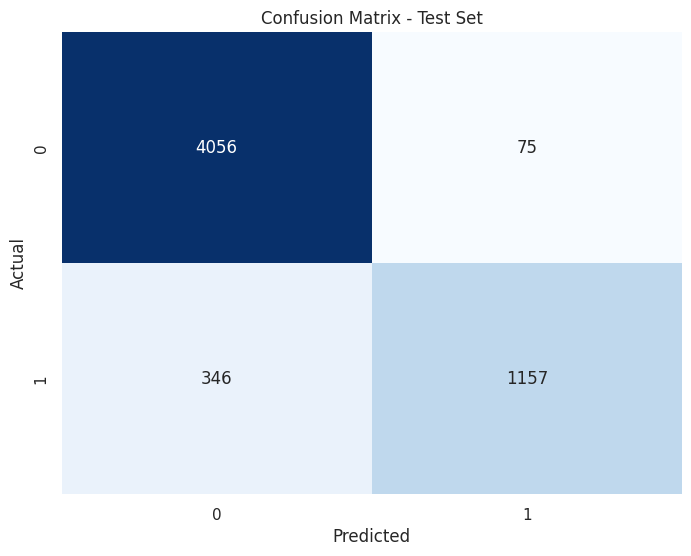

In [75]:
print(f"Classification report for classifier {rf_model_tunned}:\n"
      f"{metrics.classification_report(y_train, pred_train_tunned)}\n")

# Matriz de confusión en el conjunto de prueba
test_conf_matrix = confusion_matrix(y_train, pred_train_tunned)
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Classification report for classifier RandomForestClassifier(max_depth=7, max_samples=0.5, n_estimators=20,
                       random_state=120):
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1043
           1       0.92      0.72      0.81       366

    accuracy                           0.91      1409
   macro avg       0.92      0.85      0.88      1409
weighted avg       0.91      0.91      0.91      1409




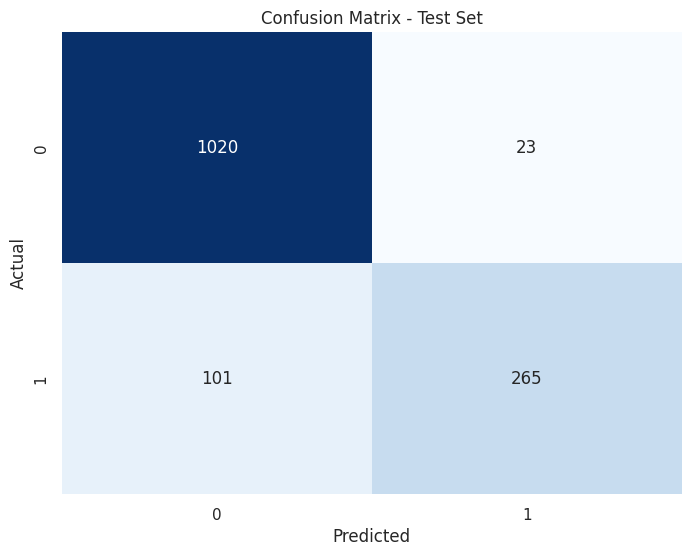

In [74]:
print(f"Classification report for classifier {rf_model_tunned}:\n"
      f"{metrics.classification_report(y_test, pred_test_tunned)}\n")

# Matriz de confusión en el conjunto de prueba
test_conf_matrix = confusion_matrix(y_test, pred_test_tunned)
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<Figure size 1200x800 with 0 Axes>

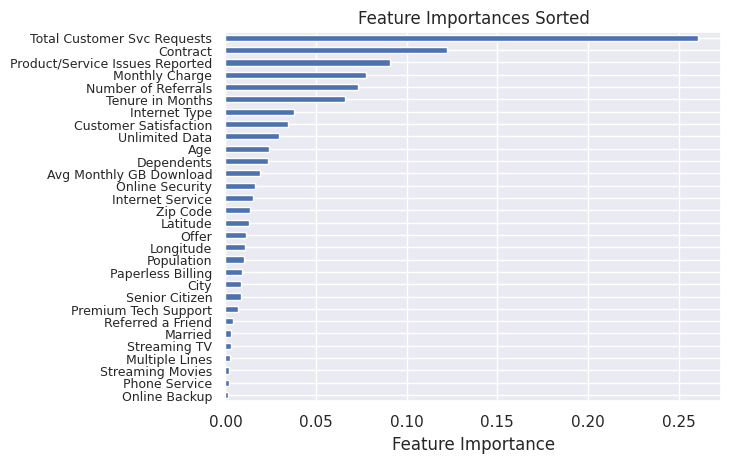

In [80]:
# Gráfico de las variables mas relevantes
df_imp_rf = pd.DataFrame(rf_model_tunned.feature_importances_.reshape(1,-1), 
                         columns=X_train.columns, 
                         index=["Feature Importances"])

# Transpose and sort by feature importance
df_imp_rf = df_imp_rf.T.sort_values(by="Feature Importances", ascending=True)

# Increase the figure size and reduce the font size for y-axis labels
plt.figure(figsize=(12, 8))  # Adjust the figsize as needed
ax = df_imp_rf.plot.barh(legend=False)

# Set smaller font size for the y-axis labels
ax.set_yticklabels(df_imp_rf.index, fontsize=9)  # Adjust fontsize as needed

plt.xlabel('Feature Importance')
plt.title('Feature Importances Sorted')
plt.show()

In [96]:
accuracy_train_rf = round(100.0*accuracy_score(y_train, pred_train_tunned),2)
accuracy_test_rf = round(100.0*accuracy_score(y_test, pred_test_tunned),2)
auc_rf = roc_auc_score(y_train, pred_train_tunned)

# Compute the classification report
report_rf = classification_report(y_test, pred_test_tunned, output_dict=True)
# Extract precision, recall, F-1 score for class 1
precision_class_1_rf = report_rf['1']['precision']
recall_class_1_rf = report_rf['1']['recall']
f1_class_1_rf = report_rf['1']['f1-score']

## **Modelo Gradient Boosting**


In [84]:
from sklearn.ensemble import GradientBoostingClassifier

# Generación del modelo inicial
gb_model = GradientBoostingClassifier(random_state=2023, max_depth=3, n_estimators=20, learning_rate=0.2, max_features=18 )
gb_model.fit(X_train, y_train)

pred_test_gb = gb_model.predict(X_test)
pred_train_gb = gb_model.predict(X_train)

print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*gb_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*gb_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 91.98
Precisión sobre los datos de test: 91.13


Classification report for classifier GradientBoostingClassifier(learning_rate=0.2, max_features=18, n_estimators=20,
                           random_state=2023):
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4131
           1       0.92      0.77      0.84      1503

    accuracy                           0.92      5634
   macro avg       0.92      0.87      0.89      5634
weighted avg       0.92      0.92      0.92      5634




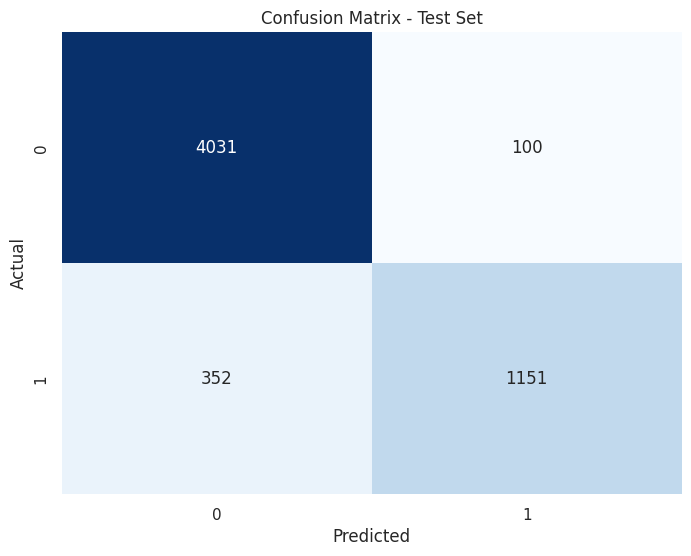

In [85]:
print(f"Classification report for classifier {gb_model}:\n"
      f"{metrics.classification_report(y_train, pred_train_gb)}\n")

# Matriz de confusión en el conjunto de prueba
test_conf_matrix = confusion_matrix(y_train, pred_train_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Classification report for classifier GradientBoostingClassifier(learning_rate=0.2, max_features=18, n_estimators=20,
                           random_state=2023):
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1043
           1       0.91      0.73      0.81       366

    accuracy                           0.91      1409
   macro avg       0.91      0.85      0.88      1409
weighted avg       0.91      0.91      0.91      1409




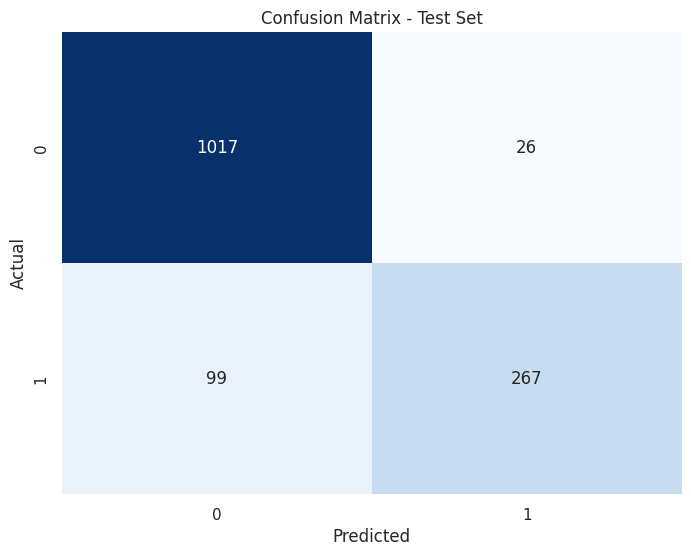

In [88]:
print(f"Classification report for classifier {gb_model}:\n"
      f"{metrics.classification_report(y_test, pred_test_gb)}\n")

# Matriz de confusión en el conjunto de prueba
test_conf_matrix = confusion_matrix(y_test, pred_test_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<Figure size 1200x800 with 0 Axes>

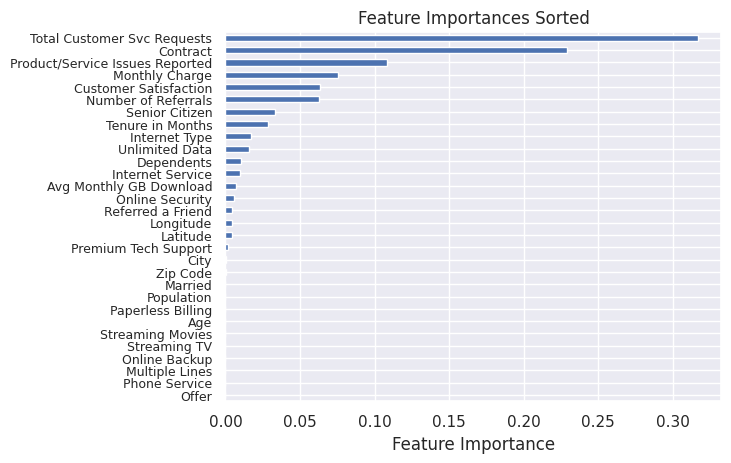

In [87]:
# Gráfico de las variables mas relevantes
df_imp_rf = pd.DataFrame(gb_model.feature_importances_.reshape(1,-1), 
                         columns=X_train.columns, 
                         index=["Feature Importances"])

# Transpose and sort by feature importance
df_imp_rf = df_imp_rf.T.sort_values(by="Feature Importances", ascending=True)

# Increase the figure size and reduce the font size for y-axis labels
plt.figure(figsize=(12, 8))  # Adjust the figsize as needed
ax = df_imp_rf.plot.barh(legend=False)

# Set smaller font size for the y-axis labels
ax.set_yticklabels(df_imp_rf.index, fontsize=9)  # Adjust fontsize as needed

plt.xlabel('Feature Importance')
plt.title('Feature Importances Sorted')
plt.show()

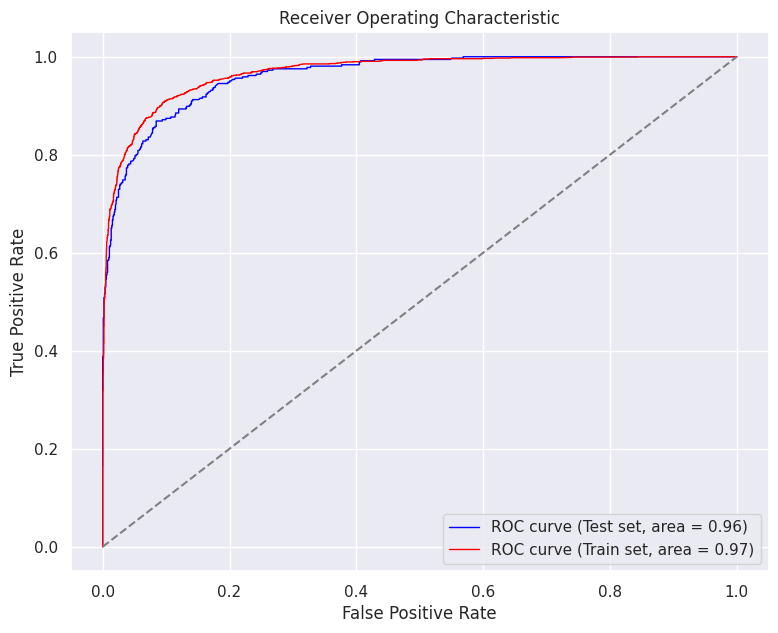

In [86]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Get predicted probabilities for test set
y_score_test = gb_model.predict_proba(X_test)[:, 1]
y_score_train = gb_model.predict_proba(X_train)[:, 1]

# Compute ROC curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_score_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Compute ROC curve for train set
fpr_train, tpr_train, _ = roc_curve(y_train, y_score_train)
roc_auc_train = auc(fpr_train, tpr_train)

# Plot ROC curve for test set
plt.figure(figsize=(9, 7))
plt.plot(fpr_test, tpr_test, color='blue', lw=1, label='ROC curve (Test set, area = %0.2f)' % roc_auc_test)

# Plot ROC curve for train set
plt.plot(fpr_train, tpr_train, color='red', lw=1, label='ROC curve (Train set, area = %0.2f)' % roc_auc_train)

# Plot a diagonal line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Labels and title
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [94]:
accuracy_train_gb = round(100.0*accuracy_score(y_train, pred_train_gb),2)
accuracy_test_gb = round(100.0*accuracy_score(y_test, pred_test_gb),2)
auc_gb = roc_auc_score(y_train, pred_train_gb)

# Compute the classification report
report_gb = classification_report(y_test, pred_test_gb, output_dict=True)
# Extract precision, recall, F-1 score for class 1
precision_class_1_gb = report_gb['1']['precision']
recall_class_1_gb = report_gb['1']['recall']
f1_class_1_gb = report_gb['1']['f1-score']

## **Comparación Modelos**

Ahora, vamos a contruir un dataframe unificado con las metricas que hemos calculado y guardado para cada modelo con el fin de poder comparar:

In [98]:
# Creación de un dataframe unificado con las metricas de cada modelo construido
models_summary = pd.DataFrame({'Model':['Logistic Regression', 'Random Forest Clasiffier', 'Gradient Boosting Clasiffier'],
                            'Accuracy Train':[accuracy_train_lr, accuracy_train_rf, accuracy_train_gb],
                            'Accuracy Test':[accuracy_test_lr, accuracy_test_rf, accuracy_test_gb],
                            'AUC':[auc_lr, auc_rf, auc_gb],
                            'precision_class_1':[precision_class_1_lr, precision_class_1_rf, precision_class_1_gb],
                            'recall_class_1_gb':[recall_class_1_lr, recall_class_1_rf, recall_class_1_gb],
                            'f1_class_1_gb':[f1_class_1_lr, f1_class_1_rf, f1_class_1_gb]
                           })

models_summary.sort_values(by='Accuracy Train', ascending=False)

,Model,Accuracy Train,Accuracy Test,AUC,precision_class_1,recall_class_1_gb,f1_class_1_gb
1,Random Forest Clasiffier,92.53,91.20,0.875819,0.920139,0.724044,0.810398
2,Gradient Boosting Clasiffier,91.98,91.13,0.870797,0.911263,0.729508,0.810319
0,Logistic Regression,91.41,90.70,0.963170,0.842566,0.789617,0.815233


In [ ]:
md_list = []
score_train_list = []
score_test_list = []

for max_features in np.arange(1, 30, 1):
  gb_model = GradientBoostingClassifier(random_state=2024, max_depth=4, n_estimators=20, learning_rate=0.2, max_features=18 )
  gb_model.fit(X_train, y_train)

  ## Generación de listas
  md_list.append(max_features)
  score_train_list.append(100.0*gb_model.score(X_train, y_train))
  score_test_list.append(100.0*gb_model.score(X_test, y_test))

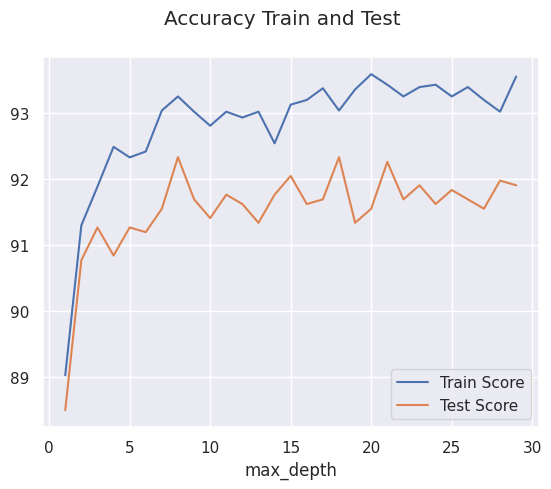

In [ ]:
df_graph = pd.DataFrame({"max_depth":md_list,
                   "score_train":score_train_list,
                   "score_test":score_test_list})

df_graph.set_index("max_depth", inplace=True)
df_graph["score_train"].plot(label="Train Score")
df_graph["score_test"].plot(label="Test Score")
plt.suptitle("Accuracy Train and Test")
plt.legend()
plt.show();